# Zomato Dataset EDA
* Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the       world which lies in their budget.
* Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which           locality of that country serves that cuisines with maximum number of restaurants.♨️

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline 
%load_ext sql

In [2]:
df1 = pd.read_csv(r"C:\Users\P PAVAN REDDY\Downloads\zomato.csv", encoding='latin-1')
df2 = pd.read_excel(r"C:\Users\P PAVAN REDDY\Downloads\Country-Code.xlsx")

In [3]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df1.sample(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2095,18458345,Shri Ram Bhojnalaya,1,Gurgaon,"Shop 6, Vohra Market, South City 2, Gurgaon",South City 2,"South City 2, Gurgaon",77.078993,28.434663,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
6571,300300,Mama's Chinese Kitchen,1,New Delhi,"4/52, Main Shankar Road, Old Rajinder Nagar, R...",Rajinder Nagar,"Rajinder Nagar, New Delhi",77.181998,28.637498,Chinese,...,Indian Rupees(Rs.),No,No,No,No,2,3.0,Orange,Average,58
7098,18291454,Chowranghee,1,New Delhi,"C-1, Main Market, Naveen Shahdara, Shahdara, N...",Shahdara,"Shahdara, New Delhi",77.285706,28.676485,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
3108,309859,Pebble Street,1,New Delhi,"61-62, N Block, Outer Circle, Connaught Place,...",Connaught Place,"Connaught Place, New Delhi",77.220442,28.630243,"Italian, Mexican, Continental, North Indian, F...",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,817
836,3000770,Cafe Totaram,1,Coimbatore,"245/1, Near Veejay Hall, Raheja Apartment, Rac...",Race Course,"Race Course, Coimbatore",76.981876,11.000762,"Cafe, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,4.0,Green,Very Good,132
4835,307283,Oberoi's,1,New Delhi,"D-166, Shop 3, Near Railway Crossing, Lajpat N...",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.238704,28.577483,North Indian,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.6,Yellow,Good,75
1172,18291229,Achoos Food Corner,1,Gurgaon,"Vohra Market, Near Government School, Ardee Ci...",Ardee City,"Ardee City, Gurgaon",77.078768,28.434728,"South Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4950,18421464,Omi Pizza,1,New Delhi,"D 3/93, Near Laxmi Nagar Metro Station, Laxmi ...",Laxmi Nagar,"Laxmi Nagar, New Delhi",77.276253,28.630224,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4604,305758,Glenz Cafe N Bakers,1,New Delhi,"5/2, WEA, Saraswati Marg, Opposite Swati Hotel...",Karol Bagh,"Karol Bagh, New Delhi",77.188550,28.647175,"Cafe, Fast Food, Desserts",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.8,Yellow,Good,230
845,3500012,The Punjabi Essence Restaurant,1,Dehradun,"27 B, Near Premier Plaza, Rajpur Road, Chukkuw...",Chukkuwala,"Chukkuwala, Dehradun",0.000000,0.000000,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,102


In [5]:
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
df2.sample(10)

,Country Code,Country
5,148,New Zealand
3,37,Canada
7,166,Qatar
2,30,Brazil
9,189,South Africa
4,94,Indonesia
1,14,Australia
12,214,UAE
13,215,United Kingdom
6,162,Phillipines


# Features and their description

### Restaurants dataset
* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality
* Longitude: Longitude coordinate of the restaurant's location
* Latitude: Latitude coordinate of the restaurant's location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people in different currencies 👫
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
* Votes: Number of ratings casted by people

### country-code data set
* Country Code: Country in which restaurant is located
* Country : Name of the country

In [7]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
#size of a dataset
df1.shape # 9551 rows , 21 colums

(9551, 21)

## Quality Issues 

- <b>Counrty Code</b> : feature has only codes and country names are in another data set. so, let's merge the Country-Code data set -
- <b>Counrty Code</b> : let's change the data type to object - 
- <b>Address</b> : In this single feature so many details are there about address of restaurant which is not required. And Locality is an useful for address. -
- <b>Locality Verbose</b> : It has locality and city in each which is not useful as we have t20 separate columns for locality and city. - 
- <b>Restaurant ID</b> : It is of int64 data type but, it should be object data type. -
- <b>Cuisines</b> : There are 9 null values. - 
- <b>Switch to order menu</b> : since all the values in 'Switch to order menu' feature are 'No', we drop the feature. -
- <b>Cuisines</b> : there are some repeated Cuisines with added white spaces to them -
## Tidiness Issues

- <b>Cuisines</b> : more than one cuisine(dish) in a single cell of rows in this feature. -
- <b>Locality</b> : has more than 1 detail about Locality with ',' separated and city is also present -


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


##### Descriptive statistics of numerical features

In [12]:
df1.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


##### summary of categorical features

In [13]:
df1.describe(include=['object'])

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [14]:
#all the values in 'Switch to order menu' feature are 'No'
df1['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

# Data Cleaning

<b>Counrty Code</b> : feature has only codes and country names are in another data set. so, let's merge the Country-Code data set

In [15]:
data = pd.merge(df1, df2, on="Country Code") # our new data frame is data

In [16]:
#we can see Country feature is added 
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [18]:
###

Dropping <b>'Address', 'Locality Verbose' and 'Switch to order menu'

In [19]:
data.drop(['Address', 'Locality Verbose', 'Switch to order menu'], axis=1, inplace=True)

In [20]:
#we can see that 'Address', 'Locality Verbose' and 'Switch to order menu' are dropped
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Locality',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [21]:
###

<b>Cuisines</b> : Since our main feature is Cuisines on which we have do analysis, There should not be any null init.
- So let's drop all the rows with null in Cuisines

In [22]:
#rows where Cuisine have null values
data[data.Cuisines.isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,Albany,-84.154000,31.577200,NaN,0,Dollar($),No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,Albany,-84.175900,31.588200,NaN,0,Dollar($),No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,Albany,-84.153400,31.575100,NaN,10,Dollar($),No,No,No,1,3.9,Yellow,Good,160,United States
288,17374552,Corkscrew Cafe,216,Gainesville,Dahlonega,-83.985800,34.531800,NaN,40,Dollar($),No,No,No,3,3.9,Yellow,Good,209,United States
312,17501439,Dovetail,216,Macon,Macon,-83.627979,32.836410,NaN,40,Dollar($),No,No,No,3,3.8,Yellow,Good,102,United States
328,17606621,HI Lite Bar & Lounge,216,Miller,Miller,-98.989100,44.515800,NaN,0,Dollar($),No,No,No,1,3.4,Orange,Average,11,United States
349,17059060,Hillstone,216,Orlando,Winter Park,-81.365260,28.596682,NaN,40,Dollar($),No,No,No,3,4.4,Green,Very Good,1158,United States
395,17142698,Leonard's Bakery,216,Rest of Hawaii,Kaimuki,-157.813432,21.284586,NaN,10,Dollar($),No,No,No,1,4.7,Dark Green,Excellent,707,United States
432,17616465,Tybee Island Social Club,216,Savannah,Tybee Island,-80.848297,31.995810,NaN,10,Dollar($),No,No,No,1,3.9,Yellow,Good,309,United States


In [23]:
#first let's make the copy of data set
data_copy = data.copy()

#dropping null values
data_copy.dropna(inplace=True)

In [24]:
#can see the no null values in the dataframe
data_copy.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [25]:
#storing back in original data variable
data = data_copy

In [26]:
###### 

<b>Cuisines</b> : more than one cuisine(dish) in a single cell of rows in this feature. so let's put each Cuisine in one separete row for each reastaurant

In [27]:
#first let's make the copy of data set
data_copy = data.copy()

#splitting the text(Cuisines) with are comma as delimiter
data_copy.Cuisines = data_copy.Cuisines.str.split(",")

data_copy.head() #we can see a list is formed in every row of Cuisines after splliting

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"[French, Japanese, Desserts]",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,[Japanese],1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"[Japanese, Sushi]",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"[Japanese, Korean]",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [28]:
#using explode() to make each Cuisine into each row

data_copy = data_copy.explode('Cuisines', ignore_index=True) #storing new dataframe into same data_copy variable

In [29]:
data_copy.head()

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,French,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,Japanese,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
2,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,Desserts,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
3,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,Seafood,4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines


In [30]:
#let's store back data_copy into the original variable
data = data_copy

data.info()  #we can also see that no of rows are increased as we put each Cuisine into a seperate row 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         19710 non-null  int64  
 1   Restaurant Name       19710 non-null  object 
 2   Country Code          19710 non-null  int64  
 3   City                  19710 non-null  object 
 4   Locality              19710 non-null  object 
 5   Longitude             19710 non-null  float64
 6   Latitude              19710 non-null  float64
 7   Cuisines              19710 non-null  object 
 8   Average Cost for two  19710 non-null  int64  
 9   Currency              19710 non-null  object 
 10  Has Table booking     19710 non-null  object 
 11  Has Online delivery   19710 non-null  object 
 12  Is delivering now     19710 non-null  object 
 13  Price range           19710 non-null  int64  
 14  Aggregate rating      19710 non-null  float64
 15  Rating color       

In [31]:
###

<b>Locality</b> : has more than 1 detail about Locality with ',' separated and city is also present. so, let's split them and remove city

In [32]:
#let's a make copy of dataframe
data_copy = data.copy()

#spllting the Locality feature and taking only the first detail
data_copy.Locality = data_copy.Locality.str.split(",").str.get(0)

In [33]:
data = data_copy #storing into original variable

data.head() # we can see the Locality column has only one detail in it

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,Century City Mall,121.027535,14.565443,French,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6317637,Le Petit Souffle,162,Makati City,Century City Mall,121.027535,14.565443,Japanese,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
2,6317637,Le Petit Souffle,162,Makati City,Century City Mall,121.027535,14.565443,Desserts,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
3,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,Edsa Shangri-La,121.056831,14.581404,Seafood,4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines


In [34]:
###

1. <b>Restaurant ID</b> : It is of int64 data type but, it should be object data type. let's change it
2. <b>Counrty Code</b> : let's change the data type to object

In [35]:
data['Restaurant ID'] = data['Restaurant ID'].astype('object') # changing data['Restaurant ID'] into oject datatype

data['Country Code'] = data['Country Code'].astype('object') # changing data['Country Code'] into oject datatype

In [36]:
data.info() #both columns data types are corrected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         19710 non-null  object 
 1   Restaurant Name       19710 non-null  object 
 2   Country Code          19710 non-null  object 
 3   City                  19710 non-null  object 
 4   Locality              19710 non-null  object 
 5   Longitude             19710 non-null  float64
 6   Latitude              19710 non-null  float64
 7   Cuisines              19710 non-null  object 
 8   Average Cost for two  19710 non-null  int64  
 9   Currency              19710 non-null  object 
 10  Has Table booking     19710 non-null  object 
 11  Has Online delivery   19710 non-null  object 
 12  Is delivering now     19710 non-null  object 
 13  Price range           19710 non-null  int64  
 14  Aggregate rating      19710 non-null  float64
 15  Rating color       

Let's also check categories in the categorical feature 

In [37]:
for feature in data.columns:                                  #we are leaving behind because they have so many unique values and thay are id's
    if data[feature].dtypes == 'object' and feature not in ['Restaurant ID', 'Restaurant Name', 'Country Code' ]:                                                             
        print(data[feature].unique(),"\n")

['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Athens' 'Augusta' 'Boise'
 'Cedar Rapids/Iowa City' 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton'
 'Davenport' 'Des Moines' 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview'
 'Lincoln' 'Macon' 'Mc Millan' 'Monroe' 'Ojo Caliente' 'Orlando'
 'Pensacola' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay' 'Armidale' 'Balingup' 'Beechworth' 'Dicky Beach'
 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs' 'Huskisson'
 'Inverloch' 'Lakes Entrance' 'Lorn' 'Macedon' 'Mayfield'
 'Middleton Beach' 'Montville' 'Palm Cove' 'Paynesville' 'Penola'
 'Phillip Island' 'Tanunda' 'Trentham East' 'Victor Harbor' 'Chatham-Kent'
 'Consort' 'Vineland Station' 'Yorkton' 'Singapore' 'Abu Dhabi' 'Dubai'
 'Sharjah' 'Agra' 'Ahmedabad' 'Al

we can see in the above output that there are some repeated Cuisines with added white spaces to them

In [38]:
#no of uinque categories(cuisines)
data.Cuisines.nunique()

249

<b>Cuisines</b> : let's trim the white spaces in the Cuisines categories 

In [39]:
#copy the data frame
data_copy = data.copy()

#using strip function to remove white spaces
data_copy.Cuisines =  data_copy.Cuisines.str.strip()

In [40]:
data = data_copy #storing back into original variable

#check the unique categories in Cuisines
data.Cuisines.unique()

array(['French', 'Japanese', 'Desserts', 'Seafood', 'Asian', 'Filipino',
       'Indian', 'Sushi', 'Korean', 'Chinese', 'European', 'Mexican',
       'American', 'Ice Cream', 'Cafe', 'Italian', 'Pizza', 'Bakery',
       'Mediterranean', 'Fast Food', 'Brazilian', 'Arabian', 'Bar Food',
       'Grill', 'International', 'Peruvian', 'Latin American', 'Burger',
       'Juices', 'Healthy Food', 'Beverages', 'Lebanese', 'Sandwich',
       'Steak', 'BBQ', 'Gourmet Fast Food', 'Mineira', 'North Eastern',
       'Coffee and Tea', 'Vegetarian', 'Tapas', 'Breakfast', 'Diner',
       'Southern', 'Southwestern', 'Spanish', 'Argentine', 'Caribbean',
       'German', 'Vietnamese', 'Thai', 'Teriyaki', 'Cajun', 'Tex-Mex',
       'Middle Eastern', 'Greek', 'Bubble Tea', 'Cuban', 'Hawaiian',
       'Salad', 'Irish', 'New American', 'Tea', 'Soul Food', 'Turkish',
       'Pub Food', 'Persian', 'British', 'Deli', 'Modern Australian',
       'Australian', 'Fusion', 'Canadian', 'Continental', 'Singaporean',
  

In [41]:
#no of unique categories in the Cuisines
data.Cuisines.nunique() 

145

Now after removing white spaces around each category, we have only <b>145</b> Categories in Cuisines

Every Quality issue and Tidiness issue which we found above are corrected

In [42]:
#storing the data frame into SQLite3 database which may be helpful for analysis
# create connection to in memory sqlite db
with sqlite3.connect(":memory:") as conn:

    # save prices dataframe to sqlite db
    data.to_sql(name="data_db", con=conn, index=False)


# Data Analysis
1. Univariate Analysis
2. Multivariate Analysis

## Univariate Analysis

### Numerical Features
- Types
1. Countinuous
2. Discerete

In [43]:
data.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000
mean,64.523947,25.682449,1313.626332,1.954947,2.866048,198.620294
std,40.901488,11.031322,16712.823852,0.920780,1.412901,497.683684
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.080263,28.470002,300.000000,1.000000,2.700000,8.000000
50%,77.190886,28.567741,500.000000,2.000000,3.300000,47.000000
75%,77.280762,28.640954,800.000000,3.000000,3.800000,175.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [44]:
#let's extact list of all numerical variables into a variable numerical_features
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'object']

print("Count of numerical_features:", len(numerical_features)," ->", numerical_features)

Count of numerical_features: 6  -> ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


<b>Countinuous Features

In [45]:
countinuous_features = [feature for feature in numerical_features if len(data[feature].unique()) >= 10 ]

print("Count of Countinuous_featues:", len(countinuous_features), "->", countinuous_features)

Count of Countinuous_featues: 5 -> ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']


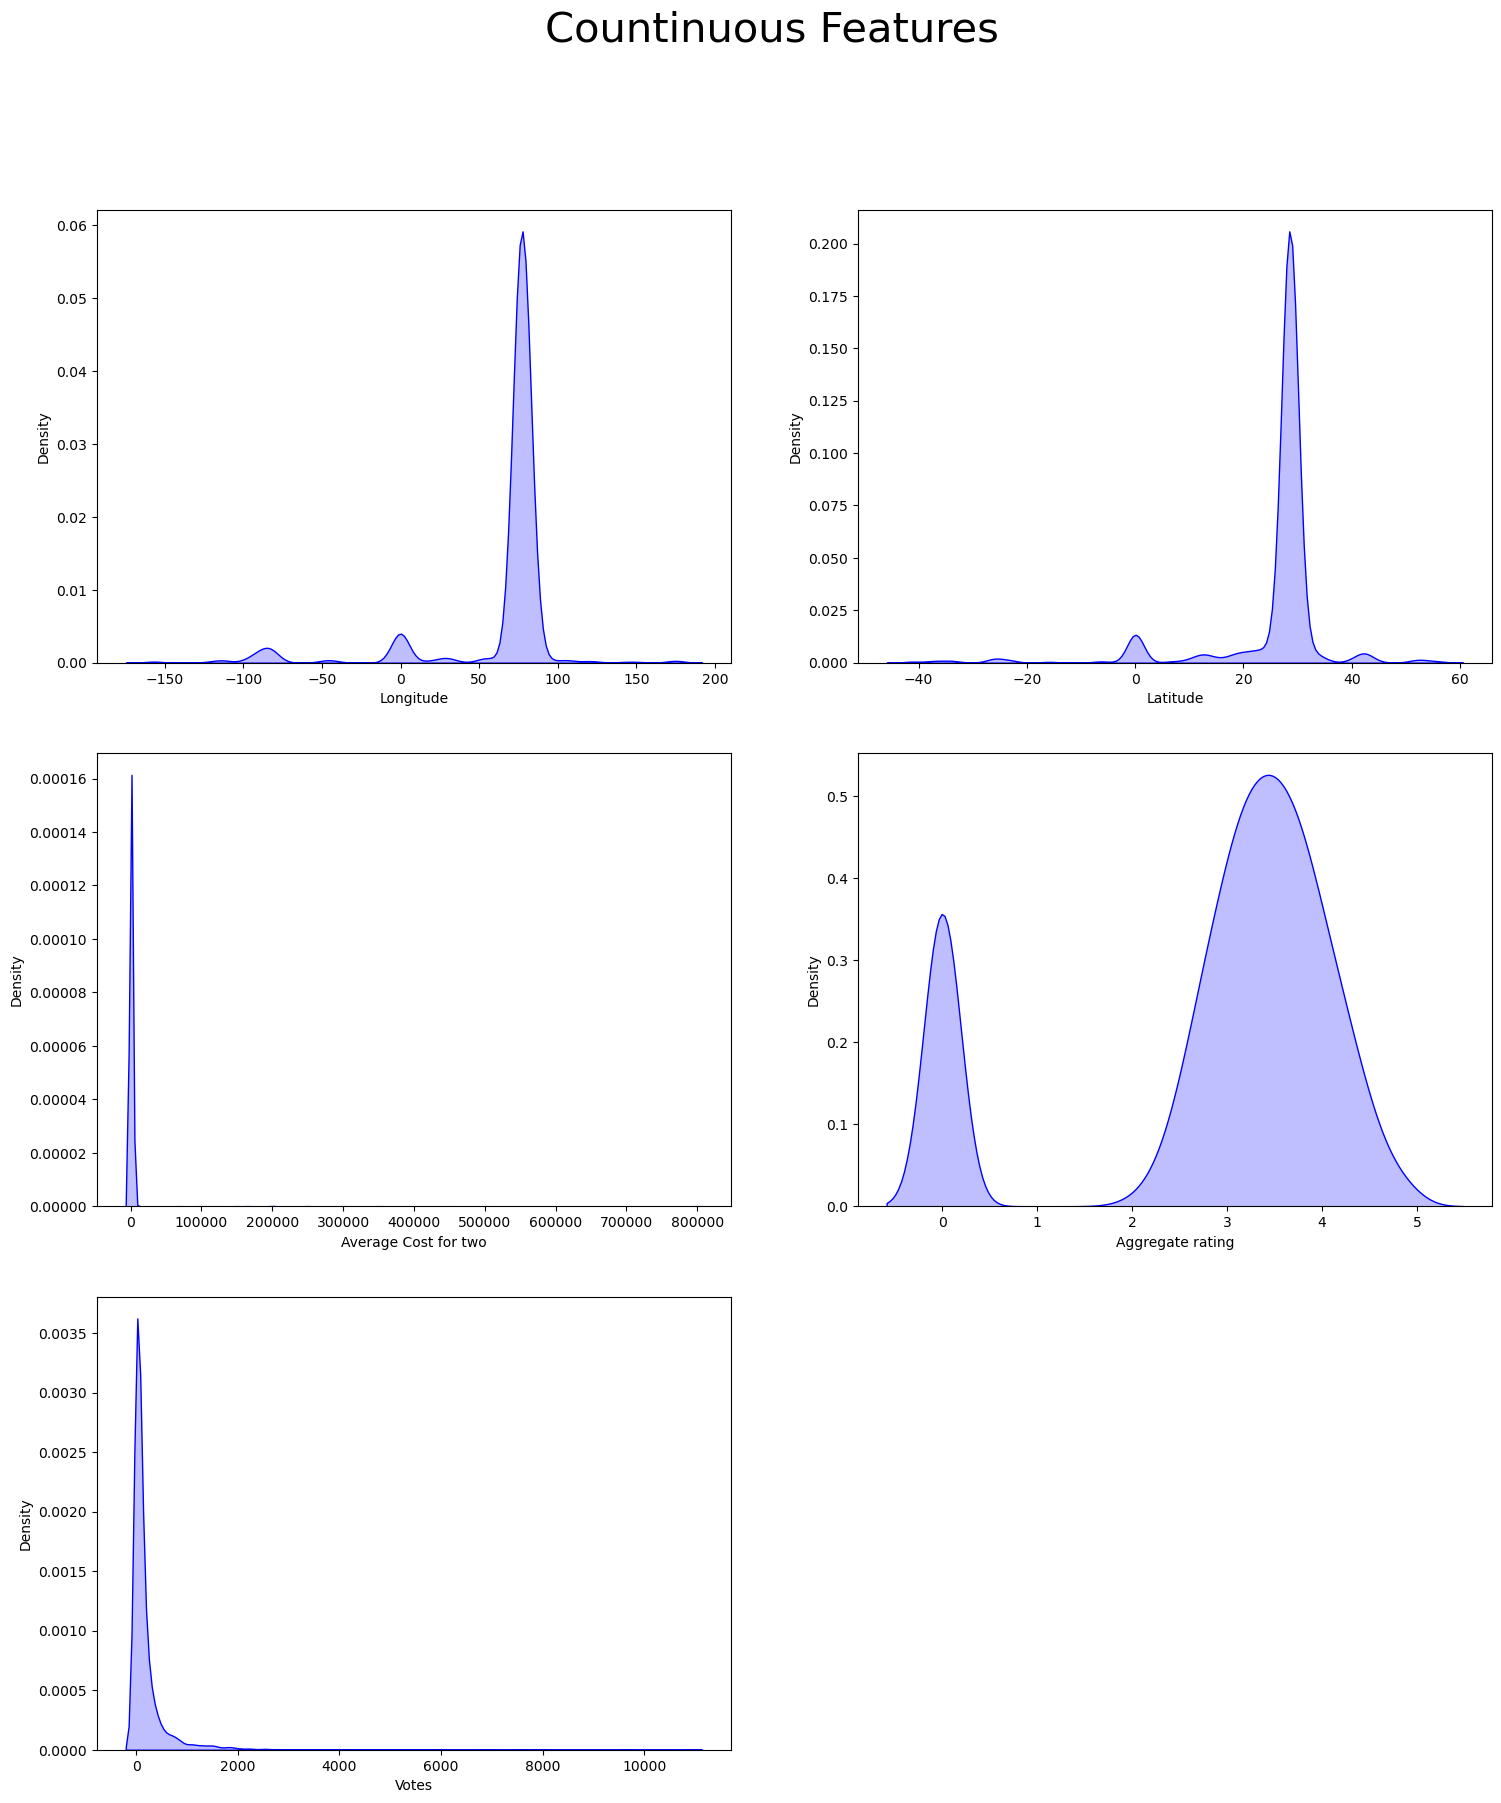

In [46]:
plt.figure(figsize=(18, 20))
plt.suptitle("Countinuous Features", fontsize=30)


for i in range(0, len(countinuous_features)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=data[countinuous_features[i]], fill=True, color='blue')
    #plt.show()

* <b>Average Cost for two

In [47]:
data['Average Cost for two'].describe()

count     19710.000000
mean       1313.626332
std       16712.823852
min           0.000000
25%         300.000000
50%         500.000000
75%         800.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

 most of the values in the 'Average Cost for two' are below 800 as we can see that 75 percentile is 800 but max is 800000

* <b>Aggregate rating

In [48]:
data['Aggregate rating'].describe()

count    19710.000000
mean         2.866048
std          1.412901
min          0.000000
25%          2.700000
50%          3.300000
75%          3.800000
max          4.900000
Name: Aggregate rating, dtype: float64

Most are of them are are between 3 to 4 and secondly most of them are 0

* <b>Votes

In [49]:
data['Votes'].describe()

count    19710.000000
mean       198.620294
std        497.683684
min          0.000000
25%          8.000000
50%         47.000000
75%        175.000000
max      10934.000000
Name: Votes, dtype: float64

Most of the restaurants received votes less than 175 as we see 75 percentile is 175 but max is 10934

<b>Discrete Features

In [50]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 10 ]

print("Count of discrete_features:", len(discrete_features), "->", discrete_features)

Count of discrete_features: 1 -> ['Price range']


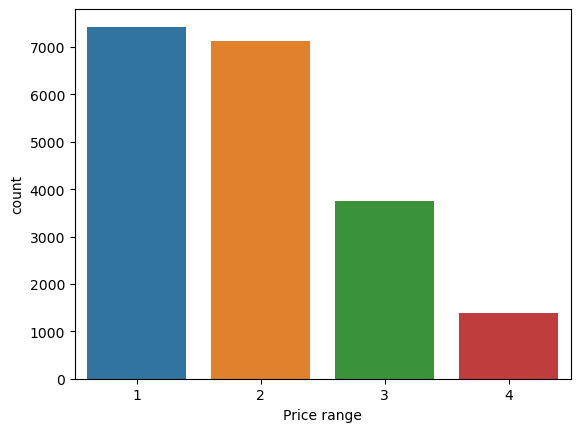

In [51]:
sns.countplot(x=data['Price range'])
plt.show()

<b>Price range</b> : Most of Cusines are of price range 1 and least of them are of price range 4

### Categorical Features

In [52]:
#let's extact list of all numerical variables into a variable numerical_features
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'object']

print("Count of categorical features:", len(categorical_features)," ->", categorical_features)

Count of categorical features: 13  -> ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']


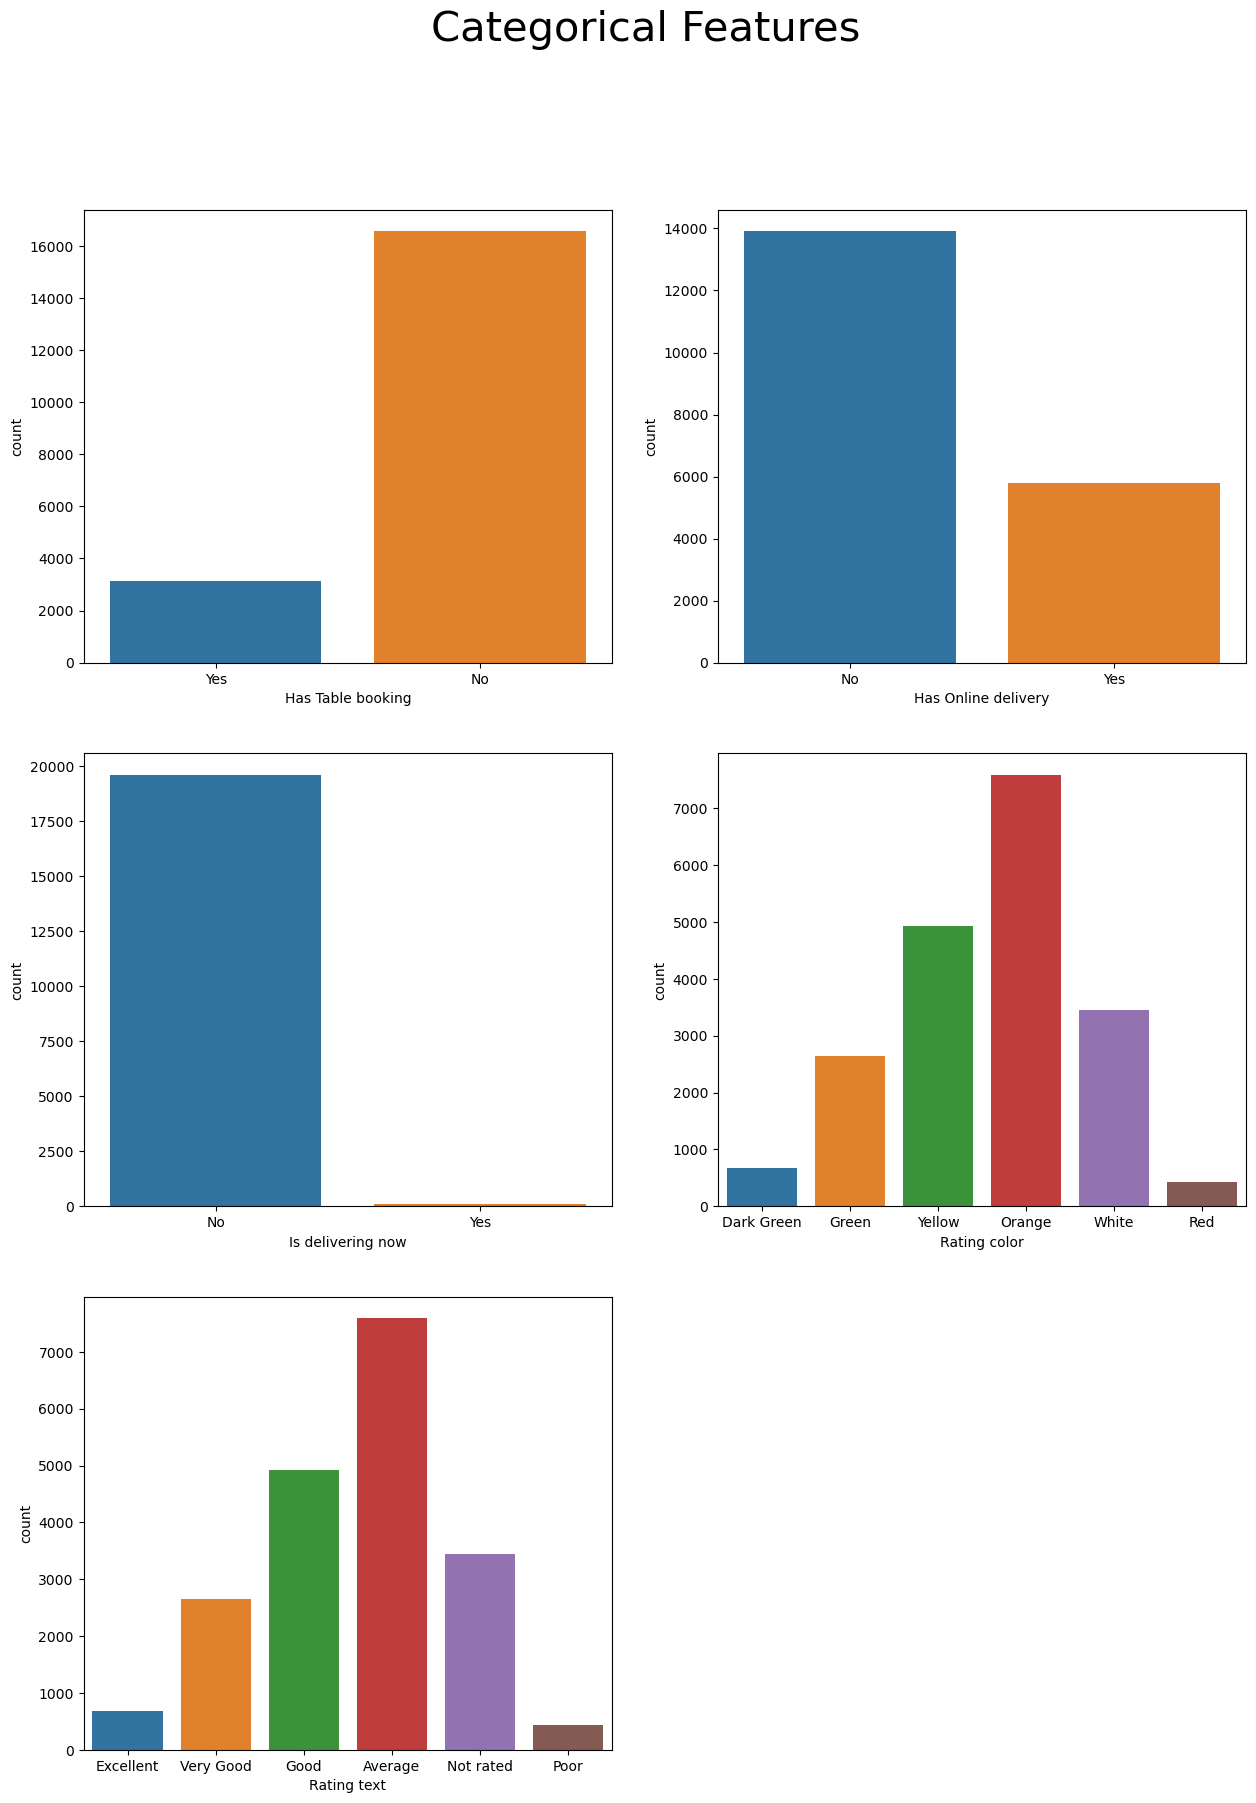

In [53]:
plt.figure(figsize=(15, 20))
plt.suptitle("Categorical Features", fontsize=30)

i=0
for feature in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text']: #taken variables which are visualizable only
    plt.subplot(3, 2, i+1)
    sns.countplot(x=data[feature])
    i=i+1
    #plt.show()
    

* 'Has Table booking' - Most of the restaurants has no table booking 
* 'Has Online delivery' - Most of the restauranrs has no online delivery
* 'Is delivering now' - Most of the restaurents are not delivering online
* 'Rating text' - Most them given Average rating 
* 'Rating color' - Corresponding to Rating text orange represents average rating and red represents poor

In [54]:
###

## Multivariate Analysis

##### Country vs No of Cuisines

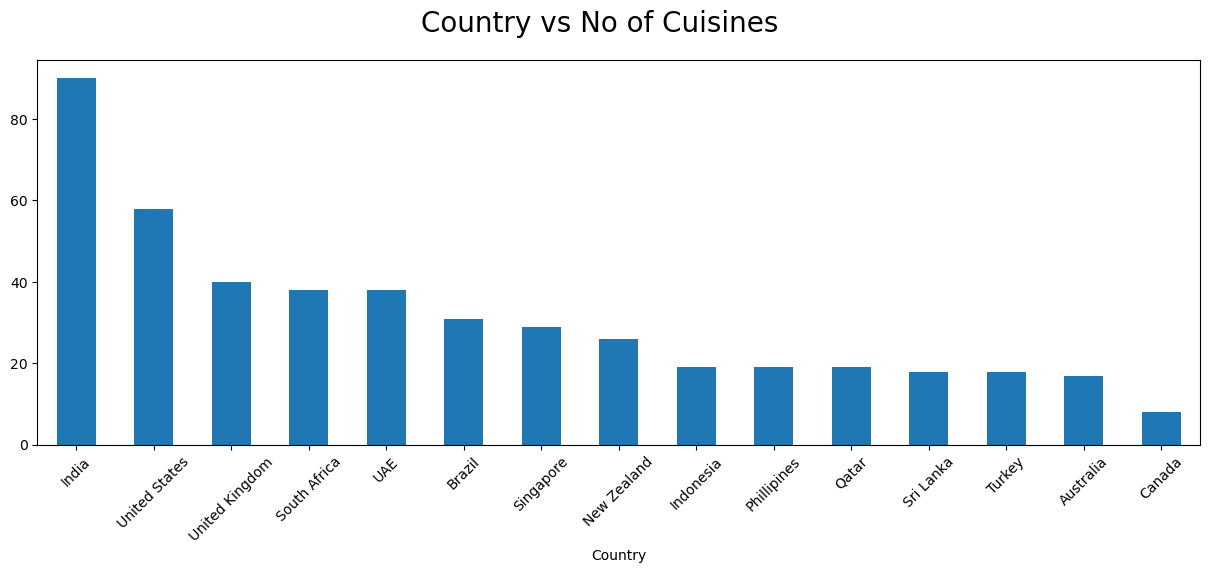

In [55]:
plt.figure(figsize=(15,5))
plt.suptitle('Country vs No of Cuisines', fontsize=20)

#groupby country extracting distinct count of cuisines
data.groupby(['Country'])['Cuisines'].nunique().sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()

In [56]:
data.groupby(['Country'])['Cuisines'].nunique().sort_values(ascending=False)

Country
India             90
United States     58
United Kingdom    40
South Africa      38
UAE               38
Brazil            31
Singapore         29
New Zealand       26
Indonesia         19
Phillipines       19
Qatar             19
Sri Lanka         18
Turkey            18
Australia         17
Canada             8
Name: Cuisines, dtype: int64

<b>India</b> has the most number of cuisines <b>(90)</b>, followed by <b>United States(58)</b> and <b>Canada has the least (8)

##### Country vs No of Restaurants

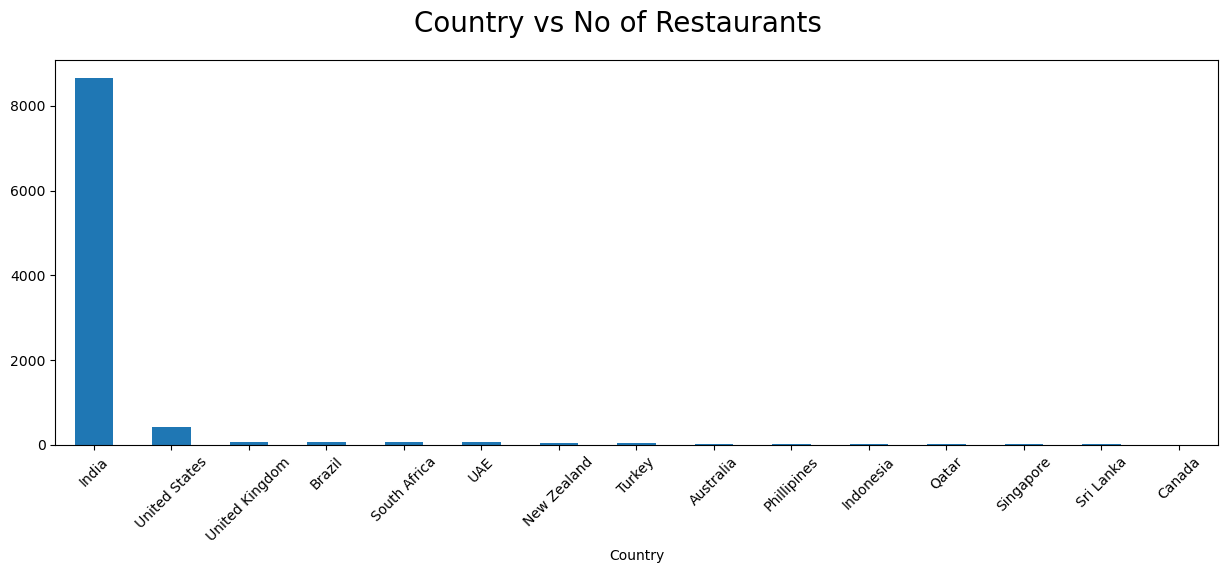

In [57]:
plt.figure(figsize=(15,5))
plt.suptitle('Country vs No of Restaurants', fontsize=20)

#groupby country extracting distinct count of Restaurants
data.groupby(['Country'])['Restaurant ID'].nunique().sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()

In [58]:
data.groupby(['Country'])['Restaurant ID'].nunique().sort_values(ascending=False)

Country
India             8652
United States      425
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Restaurant ID, dtype: int64

India has the most number of Restaurants (8652), followed by United States(425) and Canada has the least (4)

##### Countries and their mean ratings

<AxesSubplot:xlabel='Country'>

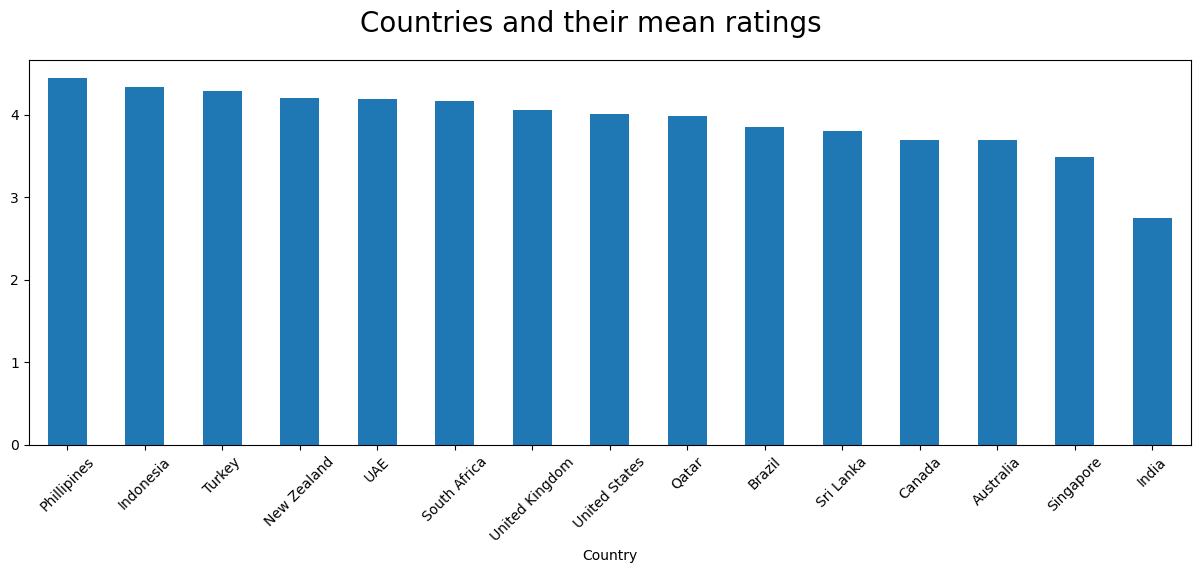

In [59]:
plt.figure(figsize=(15,5))
plt.suptitle('Countries and their mean ratings', fontsize=20)

data.groupby(['Country'])['Aggregate rating'].mean().sort_values(ascending=False).plot(kind='bar', rot=45)

In [60]:
data.groupby(['Country'])['Aggregate rating'].mean().sort_values(ascending=False)

Country
Phillipines       4.442593
Indonesia         4.334043
Turkey            4.282456
New Zealand       4.200000
UAE               4.194853
South Africa      4.166279
United Kingdom    4.052667
United States     4.009276
Qatar             3.987879
Brazil            3.851000
Sri Lanka         3.802174
Canada            3.700000
Australia         3.689796
Singapore         3.486275
India             2.744108
Name: Aggregate rating, dtype: float64

Phillipines has the highest mean ratings (4.442593) and India has least mean ratings (2.744108)

##### Countries that have online deliveries

In [61]:
data[data['Has Online delivery']=='Yes'].groupby(['Has Online delivery', 'Country']).size()

Has Online delivery  Country
Yes                  India      5729
                     UAE          72
dtype: int64

we can see that INDIA and UAE has the online delivery with (5729) and (72) as no of cuisines that has online delivery respectively

##### Analysis of Cities in INDIA 

* Top 5 Cities in India

<AxesSubplot:ylabel='Cuisines'>

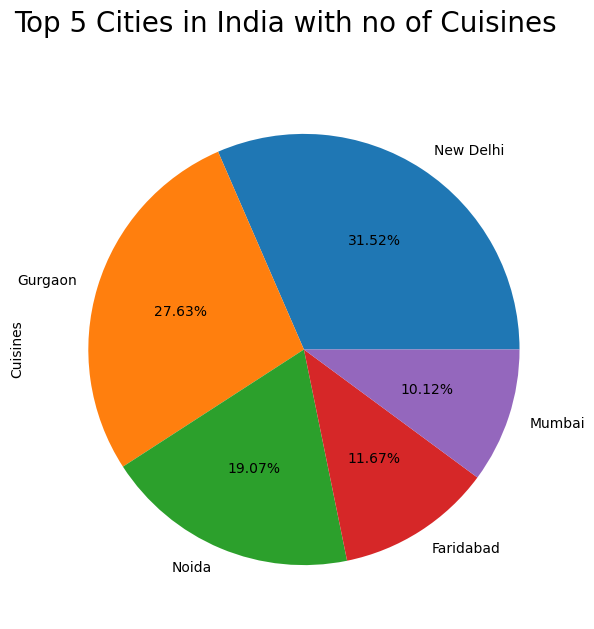

In [72]:
plt.figure(figsize=(15,7))
plt.suptitle('Top 5 Cities in India with no of Cuisines', fontsize=20)

data[data.Country=='India'].groupby('City')['Cuisines'].nunique().sort_values(ascending=False).head().plot(kind='pie', autopct='%1.2f%%')

In [73]:
data[data.Country=='India'].groupby('City')['Cuisines'].nunique().sort_values(ascending=False).head()

City
New Delhi    81
Gurgaon      71
Noida        49
Faridabad    30
Mumbai       26
Name: Cuisines, dtype: int64

We can see the top 5 cities with more no of cuisines and New Delhi has the highest from above

* Cities and their 'Average Cost for two'¶

In [160]:
data[data.Country=='India'].groupby('City')['Average Cost for two'].mean().sort_values()

City
Faridabad        476.653307
Allahabad        512.765957
Amritsar         545.714286
Mohali           550.000000
Varanasi         565.714286
Bhopal           566.250000
Noida            606.490826
Ghaziabad        673.404255
New Delhi        681.959956
Aurangabad       700.961538
Bhubaneshwar     721.296296
Nashik           722.727273
Ranchi           727.884615
Dehradun         745.652174
Gurgaon          784.508985
Nagpur           787.500000
Kochi            794.827586
Patna            800.909091
Vizag            802.500000
Guwahati         808.928571
Mangalore        811.904762
Secunderabad     825.000000
Coimbatore       826.530612
Mysore           863.617021
Ahmedabad        866.447368
Vadodara         867.391304
Surat            869.387755
Kanpur           878.846154
Agra             953.061224
Lucknow          958.035714
Indore           977.678571
Puducherry      1030.681818
Mumbai          1071.052632
Chandigarh      1075.000000
Chennai         1145.967742
Goa            

* Faridabad', 'Allahabad', 'Amritsar', 'Mohali' and  'Varanasi' are the top 5 cities with low 'Average Cost for two'

* 'Panchkula', 'Hyderabad', 'Pune', 'Jaipur' and  'Kolkata' are the bottom 5 cities with low 'Average Cost for two'

##### Indian Cities vs No of votes

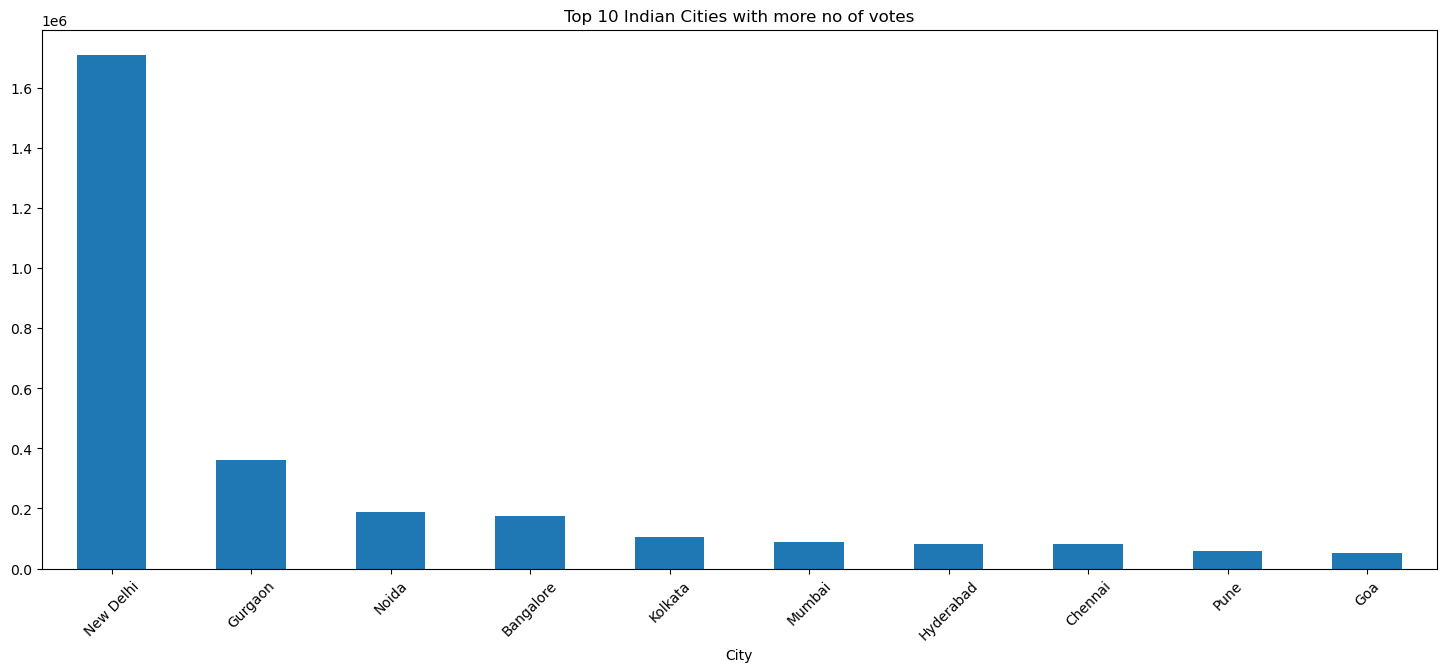

In [187]:
plt.figure(figsize=(18,7))
plt.title('Top 10 Indian Cities with more no of votes')

data[data.Country=='India'].groupby('City')['Votes'].sum().sort_values(ascending=False).head(10).plot(kind='bar', rot=45)
plt.show()

##### Indian Cuisines vs 'Average Cost for two'

In [88]:
data[data.Country=='India'].groupby('Cuisines')['Average Cost for two'].mean().sort_values()

Cuisines
Mithai             257.631579
Street Food        263.303249
Ice Cream          297.777778
Raw Meats          350.877193
Beverages          363.888889
                     ...     
Spanish           1971.428571
Sushi             2171.428571
Drinks Only       2800.000000
South American    3750.000000
Sri Lankan        6000.000000
Name: Average Cost for two, Length: 90, dtype: float64

We can the variation of 'Average Cost for two' between the cheapest Cuisine in India is 'Mithai' (257.63) and the costliest Cuisine is 'Sri Lankan' (6000.00)

##### Indian Cuisines vs 'Aggregate rating'

In [193]:
data[data.Country=='India'].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

Cuisines
Persian           4.600000
German            4.350000
Modern Indian     4.281250
Charcoal Grill    4.175000
Parsi             4.100000
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Afghani           1.418182
Armenian          1.300000
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 90, dtype: float64

'Persian', 'German', 'Modern Indian', 'Charcoal Grill', 'Parsi' are the top 5 rated Cuisines in india

##### Cuisines of India which have mean 'Aggregate rating' above 4.0

In [192]:
#storing cuisines with rating > 4
rating_4 = data[data.Country=='India'].groupby('Cuisines')['Aggregate rating'].mean()>4.0

rating_4[rating_4.values==True]

Cuisines
Burmese           True
Charcoal Grill    True
German            True
Iranian           True
Modern Indian     True
Parsi             True
Persian           True
Spanish           True
Steak             True
Name: Aggregate rating, dtype: bool

'Burmese', 'Charcoal Grill', 'German', 'Iranian', 'Modern Indian', 'Parsi', 'Persian', 'Spanish', 'Steak' are Cuisines of India which have mean 'Aggregate rating' above 4.0

##### Top 10 Indian Cuisines with more no of votes

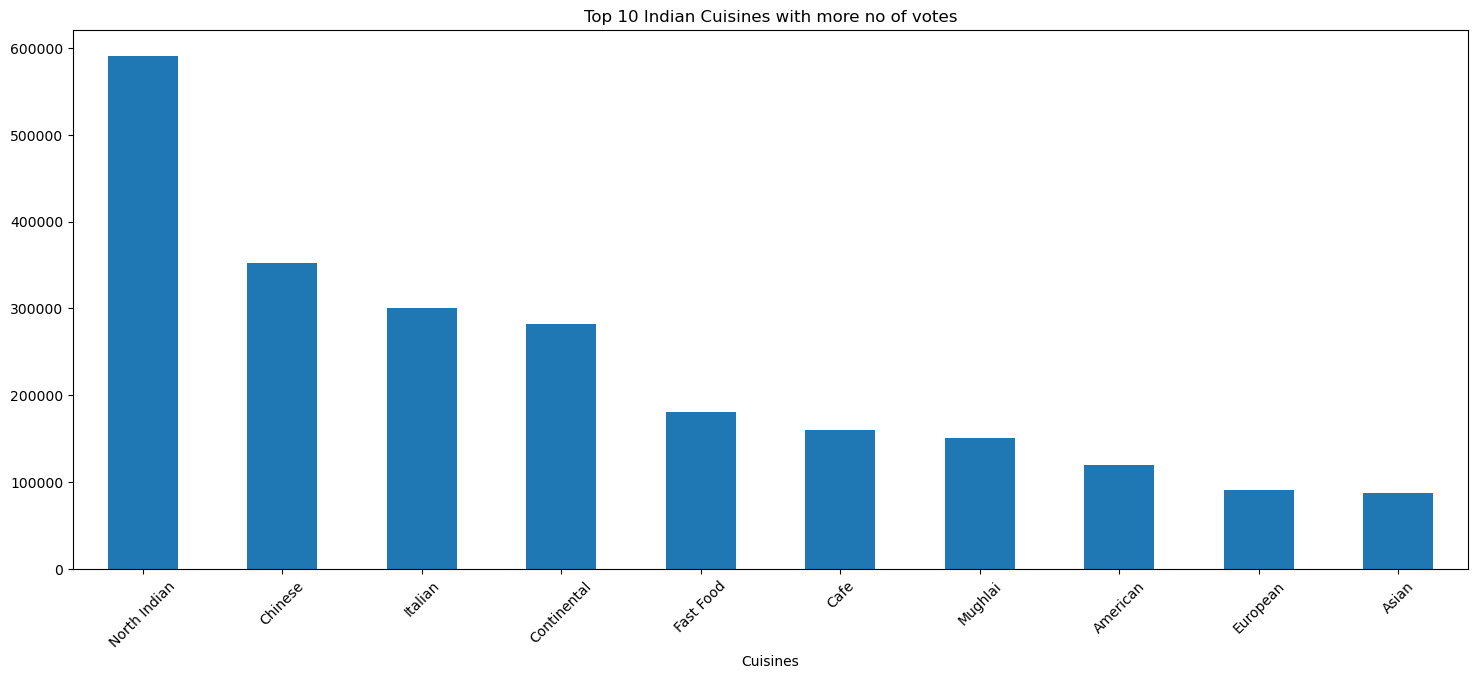

In [196]:
plt.figure(figsize=(18,7))
plt.title('Top 10 Indian Cuisines with more no of votes')

data[data.Country=='India'].groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10).plot(kind='bar', rot=45)
plt.show()